In [1]:
%matplotlib qt

In [2]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import scipy
import glob
import os
from scipy import stats
#import eelbrain
from pathlib import Path
from mne.viz import plot_epochs_image


In [4]:
# import epochs
#path = r'/Users/kevinhsu/Documents/D/000_experiment/00_LTTC/results/LTTC_MEG_final_LDT-epo_fif'
path = r'/Users/neuroling/Downloads/DINGHSIN_Results/LTTC2025_MEG&T1/LTTC_MEG_final_LDT-epo_fif'
#root_data_path = "/Users/neuroling/Downloads/DINGHSIN_Results/LTTC_MEG"
#meg_data_path = root_data_path + "LTTC_MEG_ALL_results/LTTC_MEG_final_ICAed_fif"

# absolute path to search all text files inside a specific folder
epo_files = glob.glob(path + '/S*.fif')
#epochs_merge = mne.read_epochs(path + 'LTTC_all_13subs_LDT-merge-epo.fif')

print(len(epo_files))
for n in epo_files:
    print(n)

tmp_HC_ave = []
tmp_LC_ave = []
HC_ave = []
LC_ave = []
for fif_in in epo_files: #epo_files:
    epochs = mne.read_epochs(fif_in)
    HC_ = epochs['High_CD'].average().apply_baseline((None, 0))
    LC_ = epochs['Low_CD'].average().apply_baseline((None, 0))
    
    HC_ave.append(HC_)
    LC_ave.append(LC_)
    """
    HC_ = epochs['High_CD'].average().apply_baseline((None, 0))
    LC_ = epochs['Low_CD'].average().apply_baseline((None, 0))
    tmp_HC_ave.append(HC_)
    tmp_LC_ave.append(LC_)

    #HC_mm = mne.grand_average(tmp_HC_ave)
    #LC_mm = mne.grand_average(tmp_LC_ave)
    
    HC_ave.append(HC_mm)
    LC_ave.append(LC_mm)
    """

mne.grand_average(HC_ave)
mne.grand_average(LC_ave)

evks = {'HighDiversity':HC_ave, 'LowDiversity':LC_ave}
mne.viz.plot_compare_evokeds(
    evks,
    picks="meg",
    colors=dict(HighDiversity=0, LowDiversity=1),
    axes="topo"
)


13
/Users/neuroling/Downloads/DINGHSIN_Results/LTTC2025_MEG&T1/LTTC_MEG_final_LDT-epo_fif/S020_FIF_ICAed_LDT-epo.fif
/Users/neuroling/Downloads/DINGHSIN_Results/LTTC2025_MEG&T1/LTTC_MEG_final_LDT-epo_fif/S012_FIF_ICAed_LDT-epo.fif
/Users/neuroling/Downloads/DINGHSIN_Results/LTTC2025_MEG&T1/LTTC_MEG_final_LDT-epo_fif/S022_FIF_ICAed_LDT-epo.fif
/Users/neuroling/Downloads/DINGHSIN_Results/LTTC2025_MEG&T1/LTTC_MEG_final_LDT-epo_fif/S010_FIF_ICAed_LDT-epo.fif
/Users/neuroling/Downloads/DINGHSIN_Results/LTTC2025_MEG&T1/LTTC_MEG_final_LDT-epo_fif/S016_FIF_ICAed_LDT-epo.fif
/Users/neuroling/Downloads/DINGHSIN_Results/LTTC2025_MEG&T1/LTTC_MEG_final_LDT-epo_fif/S014_FIF_ICAed_LDT-epo.fif
/Users/neuroling/Downloads/DINGHSIN_Results/LTTC2025_MEG&T1/LTTC_MEG_final_LDT-epo_fif/S013_FIF_ICAed_LDT-epo.fif
/Users/neuroling/Downloads/DINGHSIN_Results/LTTC2025_MEG&T1/LTTC_MEG_final_LDT-epo_fif/S021_FIF_ICAed_LDT-epo.fif
/Users/neuroling/Downloads/DINGHSIN_Results/LTTC2025_MEG&T1/LTTC_MEG_final_LDT-epo_fi

[<Figure size 3600x2110 with 158 Axes>]

In [58]:

mne.viz.plot_compare_evokeds(
    evks,
    picks="meg",
    colors=dict(HighDiversity=0, LowDiversity=1),
    axes="topo"
)

mne.viz.plot_compare_evokeds(evks, picks = ['MEG 060'],
                             colors=dict(HighDiversity=0, LowDiversity=1),
                             ylim=dict(eeg=[-2, 2]),
                             legend='lower right')


You are plotting to a topographical layout with >70 sensors. This can be extremely slow. Consider using mne.viz.plot_topo, which is optimized for speed.


[<Figure size 1600x1200 with 2 Axes>]

Identifying common channels ...


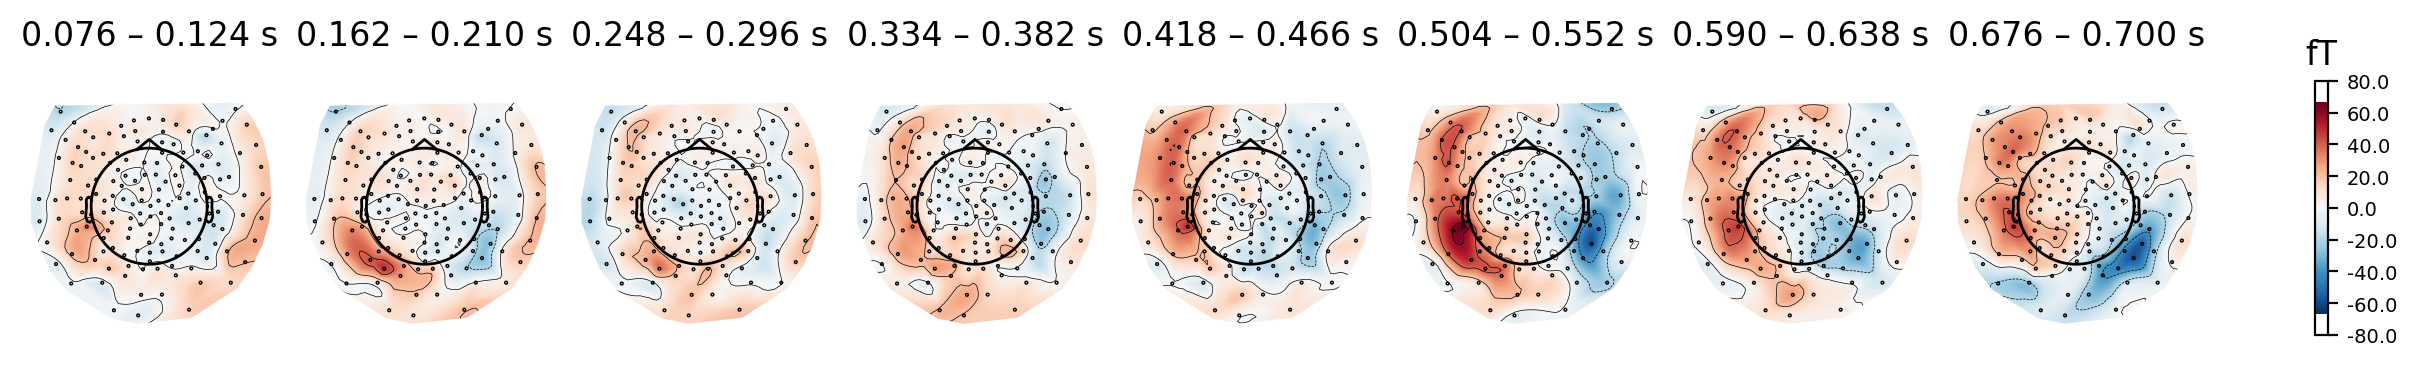

In [59]:
# Then this
evkdiff = []
for n in range(len(HC_ave)):
    temp = mne.combine_evoked([LC_ave[n], HC_ave[n]], weights=(-1, 1))
    evkdiff.append(temp)

evkdiff_ave = mne.grand_average(evkdiff)
times = np.linspace(0.1, 0.7, 8)
evkdiff_ave.plot_topomap(ch_type="mag", times=times, colorbar=True, average = 0.05, scalings = dict(mag=1e+15))


In [68]:
mne.viz.plot_compare_evokeds(evks, picks = ['MEG 060'],
                             colors=dict(HighDiversity=0, LowDiversity=1),
                             ylim=dict(eeg=[-2, 2]),
                             legend='lower right')

[<Figure size 1600x1200 with 2 Axes>]

2025-01-21 17:28:15.404 python[77545:19195036] +[CATransaction synchronize] called within transaction


In [16]:

condition1 = []
condition2 = []

for n in range(len(HC_ave)):
    temp1 = HC_ave[n].copy().get_data()*1e+15
    temp2 = LC_ave[n].copy().get_data()*1e+15
    condition1.append(temp1[56,:])
    condition2.append(temp2[56,:])
    
condition1 = np.stack(condition1)
condition2 = np.stack(condition2)

threshold = 4.0
T_obs, clusters, cluster_p_values, H0 = mne.stats.permutation_cluster_test(
    [condition1, condition2],
    n_permutations=1000,
    threshold=threshold,
    tail=1,
    n_jobs=None,
    out_type="mask",
)

stat_fun(H1): min=0.000006 max=7.490453
Running initial clustering …
Found 3 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

In [12]:
#print(T_obs, clusters, cluster_p_values, H0)
print(clusters)

[(slice(98, 112, None),), (slice(232, 241, None),), (slice(258, 265, None),), (slice(275, 325, None),), (slice(333, 348, None),), (slice(364, 370, None),), (slice(386, 400, None),)]


In [17]:
channel = 'MEG 057'
fig, (ax, ax2) = plt.subplots(2, 1, figsize=(8, 4))
ax.set_title("Channel : " + channel)
ax.plot(
    HC_ave[0].times,
    condition1.mean(axis=0) - condition2.mean(axis=0),
    label="ERF Contrast (Event 1 - Event 2)",
)
ax.set_ylabel("MEG (T / m)")
ax.legend()

for i_c, c in enumerate(clusters):
    c = c[0]
    if cluster_p_values[i_c] <= 0.05 and HC_ave[0].times[c.stop - 1] > 0.1:
        h = ax2.axvspan(HC_ave[0].times[c.start], HC_ave[0].times[c.stop - 1], color="r", alpha=0.3)
        print(H0[c])
        print(c)
        print(HC_ave[0].times[c.start], HC_ave[0].times[c.stop - 1])
        print("Sum F values = ", T_obs[c].sum())
        print("cluster_p_values = ", cluster_p_values[i_c])
    #else:
        #ax2.axvspan(HC_ave[0].times[c.start], HC_ave[0].times[c.stop - 1], color=(0.3, 0.3, 0.3), alpha=0.3)

hf = plt.plot(HC_ave[0].times, T_obs, "g")
ax2.legend((h,), ("cluster p-value < 0.05",))
ax2.set_xlabel("time (ms)")
ax2.set_ylabel("f-values")

[ 85.55778439 180.92470513  95.81865823  22.1063869   57.57978008
  12.70138752   0.          60.91353857  63.0052614   21.13867525
  50.34581644 209.20587329  98.34145579 460.82646255  41.86625361
  54.96969324  52.48991775   0.         133.33360382  17.25648574
  73.72860089 113.29299266 127.60349719 332.75583701  75.88048666
  80.57251375  76.26351093  45.15448212 101.2272937   24.47786007
 116.22777674 159.16440901  54.45066813 139.80988749  38.86772739
  12.30832657 114.09945826 101.24400503 150.20424998  78.38448601
  57.83948859  30.00584689  61.33683841 214.60688443   0.        ]
slice(283, 328, None)
0.466 0.554
Sum F values =  269.9848935934566
cluster_p_values =  0.019


Text(0, 0.5, 'f-values')

[1.25017201e-01 2.03516625e-01 3.26974286e-01 5.02473904e-01
 7.27904027e-01 9.88728192e-01 1.26257992e+00 1.52947312e+00
 1.78079527e+00 2.01952024e+00 2.25457095e+00 2.49177240e+00
 2.72434196e+00 2.92108159e+00 3.01923072e+00 2.93812471e+00
 2.63148458e+00 2.14141623e+00 1.58202657e+00 1.06246792e+00
 6.40258017e-01 3.28588920e-01 1.22292398e-01 1.57775705e-02
 1.06870908e-02 1.14995284e-01 3.33521156e-01 6.49936543e-01
 1.01168099e+00 1.34290361e+00 1.58624731e+00 1.73286741e+00
 1.81185624e+00 1.86369713e+00 1.92204651e+00 2.00865511e+00
 2.13141167e+00 2.28333918e+00 2.44061537e+00 2.56641626e+00
 2.62034635e+00 2.57246270e+00 2.41164012e+00 2.14703494e+00
 1.80261549e+00 1.41141505e+00 1.01028202e+00 6.37227372e-01
 3.28362787e-01 1.13780157e-01 1.03484386e-02 1.45863432e-02
 1.00544007e-01 2.27227959e-01 3.52870513e-01 4.47447240e-01
 4.97740896e-01 5.04807867e-01 4.78768968e-01 4.33535473e-01
 3.83512337e-01 3.41143326e-01 3.15764857e-01 3.13018084e-01
 3.35747821e-01 3.849415

In [53]:
temp = eelbrain.load.fiff.evoked_ndvar(HC_ave[0], name = 'hc', data = 'mag')
montage = eelbrain.load.fiff.sensor_dim(HC_ave[0].info)

levels = []
temp_ = []
subj_ = []

for j, s in enumerate(HC_ave):
    temp_.append(s.get_data()*1e+15)
    levels.append('hc')
    subj_.append(f'S{j:02}')
    
for j, s in enumerate(LC_ave):
    temp_.append(s.get_data()*1e+15)
    levels.append('lc')
    subj_.append(f'S{j:02}')
    
eegs = np.dstack(temp_).transpose((2, 1, 0)) # (32, 769, 30)

ds = eelbrain.Dataset()
ds['mag'] = eelbrain.NDVar(eegs, (eelbrain.Case, temp.time, montage), name='MEG', info={'unit': 'fT'})
ds['condition'] = eelbrain.Factor(levels)
ds['subject'] = subj_
ds['subject'].random = True



Could not find a adjacency matrix for the data. Computing adjacency based on Delaunay triangulations.
-- number of adjacent vertices : 157
Could not find a adjacency matrix for the data. Computing adjacency based on Delaunay triangulations.
-- number of adjacent vertices : 157


Permutation test:   0%|          | 0/8191 [00:00<?, ? permutations/s]

Permutation test:   0%|          | 0/8191 [00:00<?, ? permutations/s]

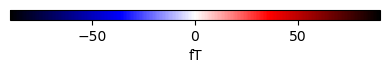

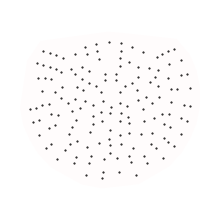

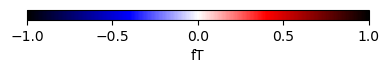

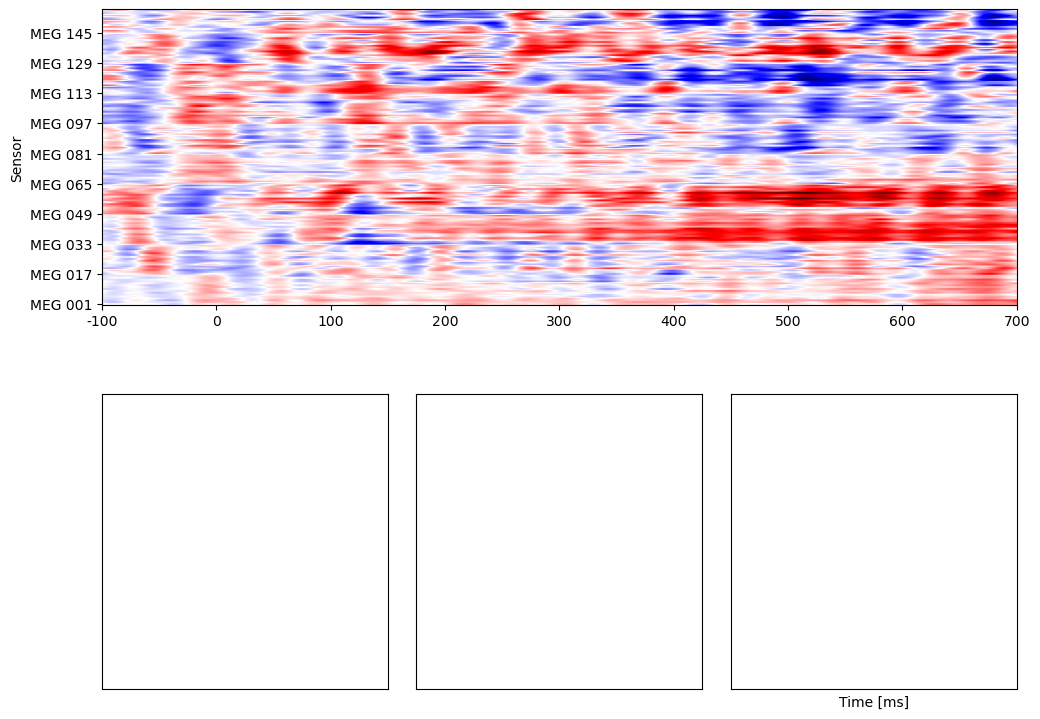

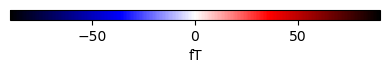

In [139]:
res = eelbrain.testnd.TTestRelated('mag', 'condition', 'hc', 'lc', match='subject',
                                   ds = ds,  pmin = 0.05, tail = 1, tstart=-0.1, tstop=0.7)

p = eelbrain.plot.Topomap(res.masked_difference())
p.plot_colorbar(width=0.1)

p = eelbrain.plot.TopoArray(res.masked_difference(), ntopo=None, xlim=(-0.100, 0.700), w=10, h = 8)
p.plot_colorbar(width=0.1)

In [167]:
clus = res.find_clusters(0.9)
print(clus)

id   tstart   tstop   duration   n_sensors   v        p         sig
-------------------------------------------------------------------
6    0.612    0.7     0.088      39          1332.6   0.50421      
11   -0.038   0.046   0.084      44          1710.3   0.4041       
25   0.442    0.6     0.158      34          1264.7   0.52814      


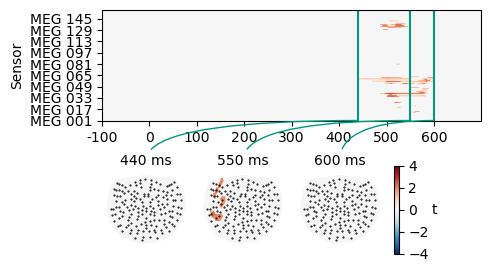

In [168]:
clus = clus[2, 'id']
cluster = res.cluster(clus)
#p = eelbrain.plot.TopoArray(cluster, interpolation='nearest', t=[0.6, 0.650, 0.68, None])
p = eelbrain.plot.TopoArray(cluster, interpolation='nearest', t=[0.44, 0.550, 0.6, None])
# plot the colorbar next to the right-most sensor plot
p_cb = p.plot_colorbar(right_of=p.axes[3])

id   tstart   tstop   duration   n_sensors   v        p         sig
-------------------------------------------------------------------
6    0.612    0.7     0.088      39          1332.6   0.50421      
11   -0.038   0.046   0.084      44          1710.3   0.4041       
25   0.442    0.6     0.158      34          1264.7   0.52814      


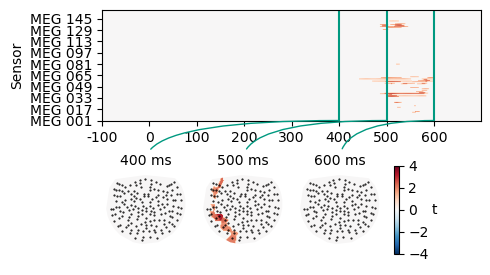

In [150]:
clus = res.find_clusters(0.9)
print(clus)

clus = clus[2, 'id']
cluster = res.cluster(clus)
p = eelbrain.plot.TopoArray(cluster, interpolation='nearest', t=[0.4, 0.50, 0.6, None])
# plot the colorbar next to the right-most sensor plot
p_cb = p.plot_colorbar(right_of=p.axes[3])

In [47]:
root_data_path = Path("/Users/neuroling/Downloads/DINGHSIN_Results/LTTC_MEG")
meg_data_path = root_data_path / "LTTC_MEG_ALL_results" #/ "LTTC_MEG_final_ICAed_fif"

epochs_merge = mne.read_epochs(meg_data_path / 'LTTC_all_13subs_LDT-merge-epo.fif')
epochs_merge

Reading /Users/neuroling/Downloads/DINGHSIN_Results/LTTC_MEG/LTTC_MEG_ALL_results/LTTC_all_13subs_LDT-merge-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -100.00 ...     700.00 ms
        0 CTF compensation matrices available
Not setting metadata
1551 matching events found
No baseline correction applied
0 projection items activated


<EpochsFIF |  1551 events (all good), -0.1 – 0.7 s, baseline -0.1 – 0 s, ~745.1 MB, data loaded,
 'High_CD': 386
 'Low_CD': 389
 'Control': 776>

In [48]:

HC_m = epochs_merge['High_CD'].average().apply_baseline((None, 0))
LC_m = epochs_merge['Low_CD'].average().apply_baseline((None, 0))


mne.viz.plot_compare_evokeds(
    [HC_m, LC_m],
    picks="meg",
    axes="topo"
)

mne.viz.plot_compare_evokeds([HC_m, LC_m], picks = ['MEG 060'],
                             ylim=dict(eeg=[-2, 2]),
                             legend='lower right')

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
You are plotting to a topographical layout with >70 sensors. This can be extremely slow. Consider using mne.viz.plot_topo, which is optimized for speed.


[<Figure size 1600x1200 with 2 Axes>]

In [33]:
mne.viz.plot_compare_evokeds([HC_m, LC_m], picks = ['MEG 060'],
                             ylim=dict(eeg=[-2, 2]),
                             legend='lower right')

[<Figure size 1600x1200 with 2 Axes>]

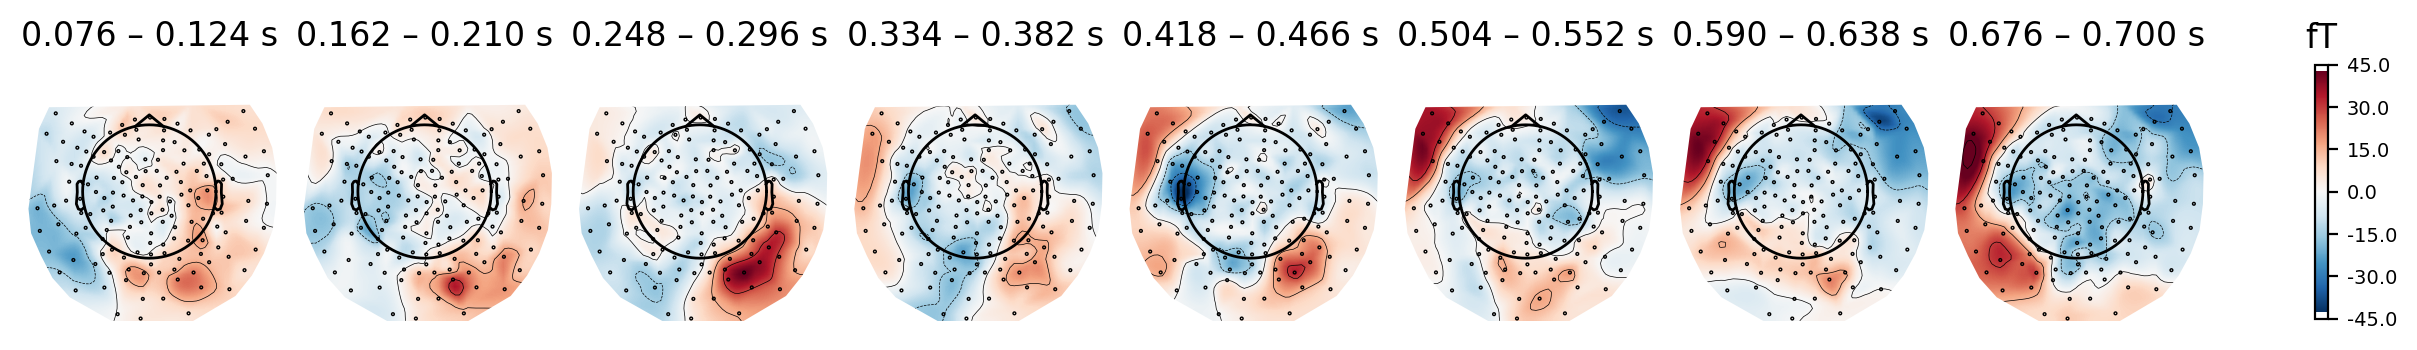

In [32]:
evkdiff_m = mne.combine_evoked([HC_m, LC_m], weights=(1, -1))

times = np.linspace(0.1, 0.7, 8)
evkdiff_m.plot_topomap(ch_type="mag", times=times, colorbar=True, average = 0.05, scalings = dict(mag=1e+15))

#evkdiff_m.save(meg_data_path / Path('n_MEG_048-evoked_topomap.png'), overwrite=True)

In [59]:
# ADHD Children

path = '/Users/kevinhsu/Documents/D/00_fju/fju_pronouns/FJU_pronoun_HHT/+550ms_artifact_ADHD&Control/'

gen_scores_adhd = np.zeros((len(sets_files), 900, 900))        

for n, file_tests in enumerate(sets_files):
    if n >= 0:
        print(n)
        eeglab_epo = mne.io.read_epochs_eeglab(path + os.path.basename(file_tests).replace('.set', 'B.set'))
        eeglab_epo.pick_types(eeg= True, stim = False, exclude = ['VEOG', 'HEOG'])
        eeglab_epo = eeglab_epo.apply_baseline((None, 0))
    
        epo1, epo2 = xDawnOneOutDenoise(eeglab_epo)
        
        n_c1 = epo1.get_data().shape[0]
        n_c2 = epo2.get_data().shape[0]
        
        examplar_data_c1 = epo1.get_data()
        examplar_data_c2 = epo2.get_data()
        
        X = np.concatenate((examplar_data_c1, examplar_data_c2), axis = 0)
        y = [1] * n_c1 + [2] * n_c2
            
        time_gen, gen_scores = decode_gen_fit(X, y)
        gen_scores_adhd[n] = gen_scores
    pass

######
#time_gen = GeneralizingEstimator(clf, n_jobs=2, scoring="roc_auc", verbose=True)

# again, cv=3 just for speed
#scores = cross_val_multiscore(time_gen, X, y, cv=5)

# Mean scores across cross-validation splits
#scores = np.mean(scores, axis=0)

# Plot the diagonal (it's exactly the same as the time-by-time decoding above)
#fig, ax = plt.subplots()
#ax.plot(epo1.times, np.diag(scores), label="score")
#ax.axhline(0.5, color="k", linestyle="--", label="chance")
#ax.set_xlabel("Times")
#ax.set_ylabel("AUC")
#ax.legend()
#ax.axvline(0.0, color="k", linestyle="-")
#ax.set_title("Decoding MEG sensors over time")
######


#with open('MMN_decoding_score_S%s_MC.npy'%s, 'wb') as f:
#    np.save(f, scores) # MC sounds
#    np.save(f, scores_B) # HK sounds
#    np.save(f, epo1.times) # times

0
Extracting parameters from /Users/kevinhsu/Documents/D/00_fju/fju_pronouns/FJU_pronoun_HHT/+550ms_artifact_ADHD&Control/216+550ms_artifactB.set...
Not setting metadata
106 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)
Total number of epochs: 26
Dropped 1 epoch: 0
Computing rank from data with rank=None
    Using tolerance 1e-11 (2.2e-16 eps * 29 dim * 1.6e+03  max singular value)
    Estimated rank (eeg): 29
    EEG: rank 29 computed from 29 data channels with 0 projectors
Reducing data rank from 29 -> 29
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 2525
[done]
Computing rank from data with rank='full'
    EEG: rank 29 from info
Reducing data rank from 29 -> 29
Estimating covariance using EMPIRICAL
Done.
Transforming to Xdawn space
Zeroing out 27 Xdawn components
Inverse transforming to sensor space
D

/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c1 = epo1.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:17: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c2 = epo2.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:19: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c1 = epo1.get_data()
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:20: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c2 

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

1
Extracting parameters from /Users/kevinhsu/Documents/D/00_fju/fju_pronouns/FJU_pronoun_HHT/+550ms_artifact_ADHD&Control/229+550ms_artifactB.set...
Not setting metadata
80 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)
Total number of epochs: 22
Dropped 1 epoch: 0
Computing rank from data with rank=None
    Using tolerance 1.5e-11 (2.2e-16 eps * 28 dim * 2.4e+03  max singular value)
    Estimated rank (eeg): 28
    EEG: rank 28 computed from 28 data channels with 0 projectors
Reducing data rank from 28 -> 28
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 2121
[done]
Computing rank from data with rank='full'
    EEG: rank 28 from info
Reducing data rank from 28 -> 28
Estimating covariance using EMPIRICAL
Done.
Transforming to Xdawn space
Zeroing out 26 Xdawn components
Inverse transforming to sensor space


/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c1 = epo1.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:17: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c2 = epo2.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:19: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c1 = epo1.get_data()
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:20: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c2 

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

2
Extracting parameters from /Users/kevinhsu/Documents/D/00_fju/fju_pronouns/FJU_pronoun_HHT/+550ms_artifact_ADHD&Control/218+550ms_artifactB.set...
Not setting metadata
110 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)
Total number of epochs: 29
Dropped 1 epoch: 0
Computing rank from data with rank=None
    Using tolerance 1.1e-11 (2.2e-16 eps * 30 dim * 1.6e+03  max singular value)
    Estimated rank (eeg): 30
    EEG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 2828
[done]
Computing rank from data with rank='full'
    EEG: rank 30 from info
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Transforming to Xdawn space
Zeroing out 28 Xdawn components
Inverse transforming to sensor space

/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c1 = epo1.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:17: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c2 = epo2.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:19: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c1 = epo1.get_data()
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:20: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c2 

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

3
Extracting parameters from /Users/kevinhsu/Documents/D/00_fju/fju_pronouns/FJU_pronoun_HHT/+550ms_artifact_ADHD&Control/221+550ms_artifactB.set...
Not setting metadata
108 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)
Total number of epochs: 28
Dropped 1 epoch: 0
Computing rank from data with rank=None
    Using tolerance 9.7e-12 (2.2e-16 eps * 27 dim * 1.6e+03  max singular value)
    Estimated rank (eeg): 27
    EEG: rank 27 computed from 27 data channels with 0 projectors
Reducing data rank from 27 -> 27
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 2727
[done]
Computing rank from data with rank='full'
    EEG: rank 27 from info
Reducing data rank from 27 -> 27
Estimating covariance using EMPIRICAL
Done.
Transforming to Xdawn space
Zeroing out 25 Xdawn components
Inverse transforming to sensor space

/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c1 = epo1.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:17: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c2 = epo2.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:19: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c1 = epo1.get_data()
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:20: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c2 

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

4
Extracting parameters from /Users/kevinhsu/Documents/D/00_fju/fju_pronouns/FJU_pronoun_HHT/+550ms_artifact_ADHD&Control/226+550ms_artifactB.set...
Not setting metadata
103 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)
Total number of epochs: 26
Dropped 1 epoch: 0
Computing rank from data with rank=None
    Using tolerance 9.5e-12 (2.2e-16 eps * 26 dim * 1.6e+03  max singular value)
    Estimated rank (eeg): 26
    EEG: rank 26 computed from 26 data channels with 0 projectors
Reducing data rank from 26 -> 26
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 2525
[done]
Computing rank from data with rank='full'
    EEG: rank 26 from info
Reducing data rank from 26 -> 26
Estimating covariance using EMPIRICAL
Done.
Transforming to Xdawn space
Zeroing out 24 Xdawn components
Inverse transforming to sensor space

/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c1 = epo1.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:17: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c2 = epo2.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:19: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c1 = epo1.get_data()
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:20: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c2 

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

5
Extracting parameters from /Users/kevinhsu/Documents/D/00_fju/fju_pronouns/FJU_pronoun_HHT/+550ms_artifact_ADHD&Control/210+550ms_artifactB.set...
Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)
Total number of epochs: 26
Dropped 1 epoch: 0
Computing rank from data with rank=None
    Using tolerance 1e-11 (2.2e-16 eps * 27 dim * 1.7e+03  max singular value)
    Estimated rank (eeg): 27
    EEG: rank 27 computed from 27 data channels with 0 projectors
Reducing data rank from 27 -> 27
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 2525
[done]
Computing rank from data with rank='full'
    EEG: rank 27 from info
Reducing data rank from 27 -> 27
Estimating covariance using EMPIRICAL
Done.
Transforming to Xdawn space
Zeroing out 25 Xdawn components
Inverse transforming to sensor space
Dr

/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c1 = epo1.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:17: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c2 = epo2.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:19: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c1 = epo1.get_data()
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:20: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c2 

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

6
Extracting parameters from /Users/kevinhsu/Documents/D/00_fju/fju_pronouns/FJU_pronoun_HHT/+550ms_artifact_ADHD&Control/228+550ms_artifactB.set...
Not setting metadata
52 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)
Total number of epochs: 27
Dropped 1 epoch: 0
Computing rank from data with rank=None
    Using tolerance 1.8e-11 (2.2e-16 eps * 30 dim * 2.6e+03  max singular value)
    Estimated rank (eeg): 30
    EEG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 2626
[done]
Computing rank from data with rank='full'
    EEG: rank 30 from info
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Transforming to Xdawn space
Zeroing out 28 Xdawn components
Inverse transforming to sensor space


/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c1 = epo1.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:17: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c2 = epo2.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:19: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c1 = epo1.get_data()
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:20: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c2 

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

7
Extracting parameters from /Users/kevinhsu/Documents/D/00_fju/fju_pronouns/FJU_pronoun_HHT/+550ms_artifact_ADHD&Control/232+550ms_artifactB.set...
Not setting metadata
103 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)
Total number of epochs: 25
Dropped 1 epoch: 0
Computing rank from data with rank=None
    Using tolerance 1.6e-11 (2.2e-16 eps * 30 dim * 2.3e+03  max singular value)
    Estimated rank (eeg): 30
    EEG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 2424
[done]
Computing rank from data with rank='full'
    EEG: rank 30 from info
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Transforming to Xdawn space
Zeroing out 28 Xdawn components
Inverse transforming to sensor space

/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c1 = epo1.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:17: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c2 = epo2.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:19: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c1 = epo1.get_data()
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:20: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c2 

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

8
Extracting parameters from /Users/kevinhsu/Documents/D/00_fju/fju_pronouns/FJU_pronoun_HHT/+550ms_artifact_ADHD&Control/204+550ms_artifactB.set...
Not setting metadata
42 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)
Total number of epochs: 22
Dropped 1 epoch: 0
Computing rank from data with rank=None
    Using tolerance 1.3e-11 (2.2e-16 eps * 28 dim * 2.2e+03  max singular value)
    Estimated rank (eeg): 28
    EEG: rank 28 computed from 28 data channels with 0 projectors
Reducing data rank from 28 -> 28
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 2121
[done]
Computing rank from data with rank='full'
    EEG: rank 28 from info
Reducing data rank from 28 -> 28
Estimating covariance using EMPIRICAL
Done.
Transforming to Xdawn space
Zeroing out 26 Xdawn components
Inverse transforming to sensor space


/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c1 = epo1.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:17: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c2 = epo2.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:19: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c1 = epo1.get_data()
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:20: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c2 

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

9
Extracting parameters from /Users/kevinhsu/Documents/D/00_fju/fju_pronouns/FJU_pronoun_HHT/+550ms_artifact_ADHD&Control/203+550ms_artifactB.set...
Not setting metadata
52 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)
Total number of epochs: 26
Dropped 1 epoch: 0
Computing rank from data with rank=None
    Using tolerance 1.2e-11 (2.2e-16 eps * 30 dim * 1.7e+03  max singular value)
    Estimated rank (eeg): 30
    EEG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 2525
[done]
Computing rank from data with rank='full'
    EEG: rank 30 from info
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Transforming to Xdawn space
Zeroing out 28 Xdawn components
Inverse transforming to sensor space


/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c1 = epo1.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:17: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c2 = epo2.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:19: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c1 = epo1.get_data()
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:20: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c2 

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

10
Extracting parameters from /Users/kevinhsu/Documents/D/00_fju/fju_pronouns/FJU_pronoun_HHT/+550ms_artifact_ADHD&Control/202+550ms_artifactB.set...
Not setting metadata
47 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)
Total number of epochs: 25
Dropped 1 epoch: 0
Computing rank from data with rank=None
    Using tolerance 1.6e-11 (2.2e-16 eps * 30 dim * 2.4e+03  max singular value)
    Estimated rank (eeg): 30
    EEG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 2424
[done]
Computing rank from data with rank='full'
    EEG: rank 30 from info
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Transforming to Xdawn space
Zeroing out 28 Xdawn components
Inverse transforming to sensor space

/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c1 = epo1.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:17: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c2 = epo2.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:19: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c1 = epo1.get_data()
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:20: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c2 

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

11
Extracting parameters from /Users/kevinhsu/Documents/D/00_fju/fju_pronouns/FJU_pronoun_HHT/+550ms_artifact_ADHD&Control/205+550ms_artifactB.set...
Not setting metadata
51 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)
Total number of epochs: 27
Dropped 1 epoch: 0
Computing rank from data with rank=None
    Using tolerance 1.1e-11 (2.2e-16 eps * 30 dim * 1.7e+03  max singular value)
    Estimated rank (eeg): 30
    EEG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 2626
[done]
Computing rank from data with rank='full'
    EEG: rank 30 from info
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Transforming to Xdawn space
Zeroing out 28 Xdawn components
Inverse transforming to sensor space

/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c1 = epo1.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:17: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c2 = epo2.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:19: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c1 = epo1.get_data()
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:20: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c2 

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

12
Extracting parameters from /Users/kevinhsu/Documents/D/00_fju/fju_pronouns/FJU_pronoun_HHT/+550ms_artifact_ADHD&Control/233+550ms_artifactB.set...
Not setting metadata
107 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)
Total number of epochs: 27
Dropped 1 epoch: 0
Computing rank from data with rank=None
    Using tolerance 1.4e-11 (2.2e-16 eps * 29 dim * 2.2e+03  max singular value)
    Estimated rank (eeg): 29
    EEG: rank 29 computed from 29 data channels with 0 projectors
Reducing data rank from 29 -> 29
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 2626
[done]
Computing rank from data with rank='full'
    EEG: rank 29 from info
Reducing data rank from 29 -> 29
Estimating covariance using EMPIRICAL
Done.
Transforming to Xdawn space
Zeroing out 27 Xdawn components
Inverse transforming to sensor spac

/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c1 = epo1.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:17: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c2 = epo2.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:19: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c1 = epo1.get_data()
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:20: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c2 

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

13
Extracting parameters from /Users/kevinhsu/Documents/D/00_fju/fju_pronouns/FJU_pronoun_HHT/+550ms_artifact_ADHD&Control/234+550ms_artifactB.set...
Not setting metadata
105 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)
Total number of epochs: 26
Dropped 1 epoch: 0
Computing rank from data with rank=None
    Using tolerance 7.6e-12 (2.2e-16 eps * 27 dim * 1.3e+03  max singular value)
    Estimated rank (eeg): 27
    EEG: rank 27 computed from 27 data channels with 0 projectors
Reducing data rank from 27 -> 27
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 2525
[done]
Computing rank from data with rank='full'
    EEG: rank 27 from info
Reducing data rank from 27 -> 27
Estimating covariance using EMPIRICAL
Done.
Transforming to Xdawn space
Zeroing out 25 Xdawn components
Inverse transforming to sensor spac

/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c1 = epo1.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:17: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c2 = epo2.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:19: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c1 = epo1.get_data()
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:20: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c2 

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

14
Extracting parameters from /Users/kevinhsu/Documents/D/00_fju/fju_pronouns/FJU_pronoun_HHT/+550ms_artifact_ADHD&Control/212+550ms_artifactB.set...
Not setting metadata
46 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)
Total number of epochs: 23
Dropped 1 epoch: 0
Computing rank from data with rank=None
    Using tolerance 1.2e-11 (2.2e-16 eps * 28 dim * 1.9e+03  max singular value)
    Estimated rank (eeg): 28
    EEG: rank 28 computed from 28 data channels with 0 projectors
Reducing data rank from 28 -> 28
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 2222
[done]
Computing rank from data with rank='full'
    EEG: rank 28 from info
Reducing data rank from 28 -> 28
Estimating covariance using EMPIRICAL
Done.
Transforming to Xdawn space
Zeroing out 26 Xdawn components
Inverse transforming to sensor space

/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c1 = epo1.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:17: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c2 = epo2.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:19: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c1 = epo1.get_data()
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:20: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c2 

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

15
Extracting parameters from /Users/kevinhsu/Documents/D/00_fju/fju_pronouns/FJU_pronoun_HHT/+550ms_artifact_ADHD&Control/224+550ms_artifactB.set...
Not setting metadata
105 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)
Total number of epochs: 28
Dropped 1 epoch: 0
Computing rank from data with rank=None
    Using tolerance 1.4e-11 (2.2e-16 eps * 30 dim * 2.1e+03  max singular value)
    Estimated rank (eeg): 30
    EEG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 2727
[done]
Computing rank from data with rank='full'
    EEG: rank 30 from info
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Transforming to Xdawn space
Zeroing out 28 Xdawn components
Inverse transforming to sensor spac

/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c1 = epo1.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:17: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c2 = epo2.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:19: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c1 = epo1.get_data()
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:20: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c2 

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

16
Extracting parameters from /Users/kevinhsu/Documents/D/00_fju/fju_pronouns/FJU_pronoun_HHT/+550ms_artifact_ADHD&Control/214+550ms_artifactB.set...
Not setting metadata
109 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)
Total number of epochs: 28
Dropped 1 epoch: 0
Computing rank from data with rank=None
    Using tolerance 9.6e-12 (2.2e-16 eps * 30 dim * 1.4e+03  max singular value)
    Estimated rank (eeg): 30
    EEG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 2727
[done]
Computing rank from data with rank='full'
    EEG: rank 30 from info
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Transforming to Xdawn space
Zeroing out 28 Xdawn components
Inverse transforming to sensor spac

/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c1 = epo1.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:17: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c2 = epo2.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:19: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c1 = epo1.get_data()
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:20: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c2 

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

17
Extracting parameters from /Users/kevinhsu/Documents/D/00_fju/fju_pronouns/FJU_pronoun_HHT/+550ms_artifact_ADHD&Control/213+550ms_artifactB.set...
Not setting metadata
45 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)
Total number of epochs: 26
Dropped 1 epoch: 0
Computing rank from data with rank=None
    Using tolerance 1.3e-11 (2.2e-16 eps * 28 dim * 2.1e+03  max singular value)
    Estimated rank (eeg): 28
    EEG: rank 28 computed from 28 data channels with 0 projectors
Reducing data rank from 28 -> 28
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 2525
[done]
Computing rank from data with rank='full'
    EEG: rank 28 from info
Reducing data rank from 28 -> 28
Estimating covariance using EMPIRICAL
Done.
Transforming to Xdawn space
Zeroing out 26 Xdawn components
Inverse transforming to sensor space

/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c1 = epo1.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:17: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c2 = epo2.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:19: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c1 = epo1.get_data()
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:20: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c2 

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

18
Extracting parameters from /Users/kevinhsu/Documents/D/00_fju/fju_pronouns/FJU_pronoun_HHT/+550ms_artifact_ADHD&Control/231+550ms_artifactB.set...
Not setting metadata
105 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)
Total number of epochs: 25
Dropped 1 epoch: 0
Computing rank from data with rank=None
    Using tolerance 9.8e-12 (2.2e-16 eps * 27 dim * 1.6e+03  max singular value)
    Estimated rank (eeg): 27
    EEG: rank 27 computed from 27 data channels with 0 projectors
Reducing data rank from 27 -> 27
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 2424
[done]
Computing rank from data with rank='full'
    EEG: rank 27 from info
Reducing data rank from 27 -> 27
Estimating covariance using EMPIRICAL
Done.
Transforming to Xdawn space
Zeroing out 25 Xdawn components
Inverse transforming to sensor spac

/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c1 = epo1.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:17: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c2 = epo2.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:19: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c1 = epo1.get_data()
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:20: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c2 

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

19
Extracting parameters from /Users/kevinhsu/Documents/D/00_fju/fju_pronouns/FJU_pronoun_HHT/+550ms_artifact_ADHD&Control/209+550ms_artifactB.set...
Not setting metadata
97 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)
Total number of epochs: 24
Dropped 1 epoch: 0
Computing rank from data with rank=None
    Using tolerance 8.2e-12 (2.2e-16 eps * 30 dim * 1.2e+03  max singular value)
    Estimated rank (eeg): 30
    EEG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 2323
[done]
Computing rank from data with rank='full'
    EEG: rank 30 from info
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Transforming to Xdawn space
Zeroing out 28 Xdawn components
Inverse transforming to sensor space

/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c1 = epo1.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:17: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c2 = epo2.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:19: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c1 = epo1.get_data()
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:20: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c2 

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

20
Extracting parameters from /Users/kevinhsu/Documents/D/00_fju/fju_pronouns/FJU_pronoun_HHT/+550ms_artifact_ADHD&Control/236+550ms_artifactB.set...
Not setting metadata
56 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)
Total number of epochs: 29
Dropped 1 epoch: 0
Computing rank from data with rank=None
    Using tolerance 1.1e-11 (2.2e-16 eps * 28 dim * 1.7e+03  max singular value)
    Estimated rank (eeg): 28
    EEG: rank 28 computed from 28 data channels with 0 projectors
Reducing data rank from 28 -> 28
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 2828
[done]
Computing rank from data with rank='full'
    EEG: rank 28 from info
Reducing data rank from 28 -> 28
Estimating covariance using EMPIRICAL
Done.
Transforming to Xdawn space
Zeroing out 26 Xdawn components
Inverse transforming to sensor space

/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c1 = epo1.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:17: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c2 = epo2.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:19: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c1 = epo1.get_data()
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:20: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c2 

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

21
Extracting parameters from /Users/kevinhsu/Documents/D/00_fju/fju_pronouns/FJU_pronoun_HHT/+550ms_artifact_ADHD&Control/239+550ms_artifactB.set...
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)
Total number of epochs: 24
Dropped 1 epoch: 0
Computing rank from data with rank=None
    Using tolerance 9.6e-12 (2.2e-16 eps * 27 dim * 1.6e+03  max singular value)
    Estimated rank (eeg): 27
    EEG: rank 27 computed from 27 data channels with 0 projectors
Reducing data rank from 27 -> 27
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 2323
[done]
Computing rank from data with rank='full'
    EEG: rank 27 from info
Reducing data rank from 27 -> 27
Estimating covariance using EMPIRICAL
Done.
Transforming to Xdawn space
Zeroing out 25 Xdawn components
Inverse transforming to sensor space

/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c1 = epo1.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:17: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c2 = epo2.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:19: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c1 = epo1.get_data()
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:20: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c2 

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

22
Extracting parameters from /Users/kevinhsu/Documents/D/00_fju/fju_pronouns/FJU_pronoun_HHT/+550ms_artifact_ADHD&Control/206+550ms_artifactB.set...
Not setting metadata
45 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)
Total number of epochs: 23
Dropped 1 epoch: 0
Computing rank from data with rank=None
    Using tolerance 1e-11 (2.2e-16 eps * 30 dim * 1.5e+03  max singular value)
    Estimated rank (eeg): 30
    EEG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 2222
[done]
Computing rank from data with rank='full'
    EEG: rank 30 from info
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Transforming to Xdawn space
Zeroing out 28 Xdawn components
Inverse transforming to sensor space
D

/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c1 = epo1.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:17: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c2 = epo2.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:19: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c1 = epo1.get_data()
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:20: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c2 

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

23
Extracting parameters from /Users/kevinhsu/Documents/D/00_fju/fju_pronouns/FJU_pronoun_HHT/+550ms_artifact_ADHD&Control/208+550ms_artifactB.set...
Not setting metadata
42 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)
Total number of epochs: 19
Dropped 1 epoch: 0
Computing rank from data with rank=None
    Using tolerance 1.3e-11 (2.2e-16 eps * 30 dim * 1.9e+03  max singular value)
    Estimated rank (eeg): 30
    EEG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 1818
[done]
Computing rank from data with rank='full'
    EEG: rank 30 from info
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Transforming to Xdawn space
Zeroing out 28 Xdawn components
Inverse transforming to sensor space

/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c1 = epo1.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:17: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c2 = epo2.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:19: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c1 = epo1.get_data()
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:20: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c2 

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

24
Extracting parameters from /Users/kevinhsu/Documents/D/00_fju/fju_pronouns/FJU_pronoun_HHT/+550ms_artifact_ADHD&Control/237+550ms_artifactB.set...
Not setting metadata
91 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)
Total number of epochs: 24
Dropped 1 epoch: 0
Computing rank from data with rank=None
    Using tolerance 1.8e-11 (2.2e-16 eps * 28 dim * 2.9e+03  max singular value)
    Estimated rank (eeg): 28
    EEG: rank 28 computed from 28 data channels with 0 projectors
Reducing data rank from 28 -> 28
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 2323
[done]
Computing rank from data with rank='full'
    EEG: rank 28 from info
Reducing data rank from 28 -> 28
Estimating covariance using EMPIRICAL
Done.
Transforming to Xdawn space
Zeroing out 26 Xdawn components
Inverse transforming to sensor space

/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c1 = epo1.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:17: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c2 = epo2.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:19: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c1 = epo1.get_data()
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:20: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c2 

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

25
Extracting parameters from /Users/kevinhsu/Documents/D/00_fju/fju_pronouns/FJU_pronoun_HHT/+550ms_artifact_ADHD&Control/230+550ms_artifactB.set...
Not setting metadata
92 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)
Total number of epochs: 26
Dropped 1 epoch: 0
Computing rank from data with rank=None
    Using tolerance 1.5e-11 (2.2e-16 eps * 28 dim * 2.4e+03  max singular value)
    Estimated rank (eeg): 28
    EEG: rank 28 computed from 28 data channels with 0 projectors
Reducing data rank from 28 -> 28
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 2525
[done]
Computing rank from data with rank='full'
    EEG: rank 28 from info
Reducing data rank from 28 -> 28
Estimating covariance using EMPIRICAL
Done.
Transforming to Xdawn space
Zeroing out 26 Xdawn components
Inverse transforming to sensor space

/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c1 = epo1.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:17: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c2 = epo2.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:19: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c1 = epo1.get_data()
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/316254295.py:20: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c2 

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

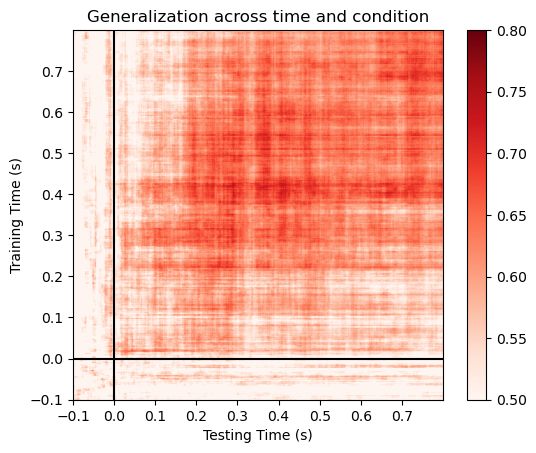

In [60]:
with open('Pronoun_decoding_genscore_adhd_2d.npy', 'wb') as f:
    np.save(f, gen_scores_adhd)
    
#mean_scores = gen_scores_adults.mean(0)

fig, ax = plt.subplots(1)
im = ax.matshow(gen_scores_adhd.mean(0), vmin=0.5, vmax=0.8, cmap='Reds', origin='lower',#cmap='RdBu_r'
                extent=epo1.times[[0, -1, 0, -1]])
ax.axhline(0., color='k')
ax.axvline(0., color='k')
ax.xaxis.set_ticks_position('bottom')
ax.set_xlabel('Testing Time (s)')
ax.set_ylabel('Training Time (s)')
ax.set_title('Generalization across time and condition')
plt.colorbar(im, ax=ax)
plt.show()


-


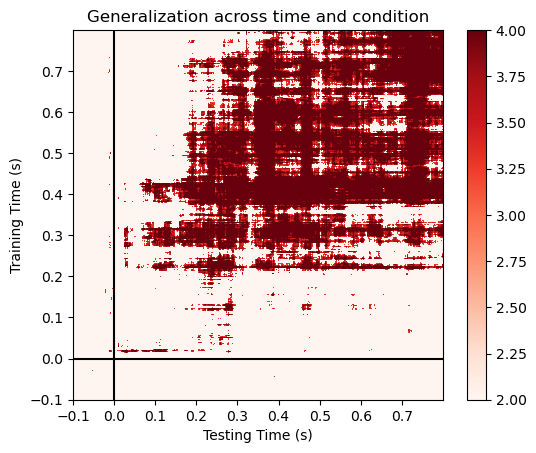

In [67]:
statistic, pvalues = stats.ttest_1samp(gen_scores_adhd, popmean = 0.5, axis = 0)
reject_fdr, pval_fdr = mne.stats.fdr_correction(pvalues, alpha=0.01, method="indep")
tmask = np.zeros((pvalues.shape[0], pvalues.shape[1]))
tmask[reject_fdr] = statistic[reject_fdr]
#threshold_fdr = np.min(np.abs(statistic)[reject_fdr])


print('-')
fig, ax = plt.subplots(1)
im = ax.matshow(tmask, vmin=2, vmax=4, cmap='Reds', origin='lower',#cmap='RdBu_r'
                extent=epo1.times[[0, -1, 0, -1]])
ax.axhline(0., color='k')
ax.axvline(0., color='k')
ax.xaxis.set_ticks_position('bottom')
ax.set_xlabel('Testing Time (s)')
ax.set_ylabel('Training Time (s)')
ax.set_title('Generalization across time and condition')
plt.colorbar(im, ax=ax)
plt.show()

In [61]:
# Control Children

path = r'/Users/kevinhsu/Documents/D/00_fju/fju_pronouns/FJU_pronoun_HHT/2.2.Control_afterHHTprocessingFile'
sets_files = glob.glob(path+'/**/*550ms_artifact.set', recursive=True)

print(len(sets_files))
for n in sets_files:
    print(os.path.basename(n).replace('.set', 'B.set'))

path = '/Users/kevinhsu/Documents/D/00_fju/fju_pronouns/FJU_pronoun_HHT/+550ms_artifact_ADHD&Control/'
eeglab_epo = mne.io.read_epochs_eeglab(path + os.path.basename(sets_files[0]).replace('.set', 'B.set'))
eeglab_epo.get_data().shape

21
104+550ms_artifactB.set
134+550ms_artifactB.set
116+550ms_artifactB.set
127+550ms_artifactB.set
120+550ms_artifactB.set
121+550ms_artifactB.set
119+550ms_artifactB.set
126+550ms_artifactB.set
128+550ms_artifactB.set
117+550ms_artifactB.set
131+550ms_artifactB.set
107+550ms_artifactB.set
108+550ms_artifactB.set
225+550ms_artifactB.set
238+550ms_artifactB.set
112+550ms_artifactB.set
115+550ms_artifactB.set
124+550ms_artifactB.set
122+550ms_artifactB.set
114+550ms_artifactB.set
113+550ms_artifactB.set
Extracting parameters from /Users/kevinhsu/Documents/D/00_fju/fju_pronouns/FJU_pronoun_HHT/+550ms_artifact_ADHD&Control/104+550ms_artifactB.set...
Not setting metadata
56 matching events found
No baseline correction applied
0 projection items activated
Ready.


/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/3183325248.py:12: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeglab_epo.get_data().shape


(56, 32, 900)

In [62]:
# Control Children

path = '/Users/kevinhsu/Documents/D/00_fju/fju_pronouns/FJU_pronoun_HHT/+550ms_artifact_ADHD&Control/'

gen_scores_ctrl = np.zeros((len(sets_files), 900, 900))        

for n, file_tests in enumerate(sets_files):
    if n >= 0:
        print(n)
        eeglab_epo = mne.io.read_epochs_eeglab(path + os.path.basename(file_tests).replace('.set', 'B.set'))
        eeglab_epo.pick_types(eeg= True, stim = False, exclude = ['VEOG', 'HEOG'])
        eeglab_epo = eeglab_epo.apply_baseline((None, 0))
    
        epo1, epo2 = xDawnOneOutDenoise(eeglab_epo)
        
        n_c1 = epo1.get_data().shape[0]
        n_c2 = epo2.get_data().shape[0]
        
        examplar_data_c1 = epo1.get_data()
        examplar_data_c2 = epo2.get_data()
        
        X = np.concatenate((examplar_data_c1, examplar_data_c2), axis = 0)
        y = [1] * n_c1 + [2] * n_c2
            
        time_gen, gen_scores = decode_gen_fit(X, y)
        gen_scores_ctrl[n] = gen_scores
    pass

######
#time_gen = GeneralizingEstimator(clf, n_jobs=2, scoring="roc_auc", verbose=True)

# again, cv=3 just for speed
#scores = cross_val_multiscore(time_gen, X, y, cv=5)

# Mean scores across cross-validation splits
#scores = np.mean(scores, axis=0)

# Plot the diagonal (it's exactly the same as the time-by-time decoding above)
#fig, ax = plt.subplots()
#ax.plot(epo1.times, np.diag(scores), label="score")
#ax.axhline(0.5, color="k", linestyle="--", label="chance")
#ax.set_xlabel("Times")
#ax.set_ylabel("AUC")
#ax.legend()
#ax.axvline(0.0, color="k", linestyle="-")
#ax.set_title("Decoding MEG sensors over time")
######


#with open('MMN_decoding_score_S%s_MC.npy'%s, 'wb') as f:
#    np.save(f, scores) # MC sounds
#    np.save(f, scores_B) # HK sounds
#    np.save(f, epo1.times) # times

0
Extracting parameters from /Users/kevinhsu/Documents/D/00_fju/fju_pronouns/FJU_pronoun_HHT/+550ms_artifact_ADHD&Control/104+550ms_artifactB.set...
Not setting metadata
56 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)
Total number of epochs: 29
Dropped 1 epoch: 0
Computing rank from data with rank=None
    Using tolerance 9e-12 (2.2e-16 eps * 30 dim * 1.3e+03  max singular value)
    Estimated rank (eeg): 30
    EEG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 2828
[done]
Computing rank from data with rank='full'
    EEG: rank 30 from info
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Transforming to Xdawn space
Zeroing out 28 Xdawn components
Inverse transforming to sensor space
Dr

/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c1 = epo1.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:17: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c2 = epo2.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:19: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c1 = epo1.get_data()
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:20: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

1
Extracting parameters from /Users/kevinhsu/Documents/D/00_fju/fju_pronouns/FJU_pronoun_HHT/+550ms_artifact_ADHD&Control/134+550ms_artifactB.set...
Not setting metadata
56 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)
Total number of epochs: 29
Dropped 1 epoch: 0
Computing rank from data with rank=None
    Using tolerance 8.7e-12 (2.2e-16 eps * 30 dim * 1.3e+03  max singular value)
    Estimated rank (eeg): 30
    EEG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 2828
[done]
Computing rank from data with rank='full'
    EEG: rank 30 from info
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Transforming to Xdawn space
Zeroing out 28 Xdawn components
Inverse transforming to sensor space


/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c1 = epo1.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:17: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c2 = epo2.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:19: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c1 = epo1.get_data()
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:20: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

2
Extracting parameters from /Users/kevinhsu/Documents/D/00_fju/fju_pronouns/FJU_pronoun_HHT/+550ms_artifact_ADHD&Control/116+550ms_artifactB.set...
Not setting metadata
108 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)
Total number of epochs: 29
Dropped 1 epoch: 0
Computing rank from data with rank=None
    Using tolerance 1.1e-11 (2.2e-16 eps * 29 dim * 1.7e+03  max singular value)
    Estimated rank (eeg): 29
    EEG: rank 29 computed from 29 data channels with 0 projectors
Reducing data rank from 29 -> 29
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 2828
[done]
Computing rank from data with rank='full'
    EEG: rank 29 from info
Reducing data rank from 29 -> 29
Estimating covariance using EMPIRICAL
Done.
Transforming to Xdawn space
Zeroing out 27 Xdawn components
Inverse transforming to sensor space

/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c1 = epo1.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:17: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c2 = epo2.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:19: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c1 = epo1.get_data()
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:20: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

3
Extracting parameters from /Users/kevinhsu/Documents/D/00_fju/fju_pronouns/FJU_pronoun_HHT/+550ms_artifact_ADHD&Control/127+550ms_artifactB.set...
Not setting metadata
107 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)
Total number of epochs: 26
Dropped 1 epoch: 0
Computing rank from data with rank=None
    Using tolerance 1.4e-11 (2.2e-16 eps * 30 dim * 2.1e+03  max singular value)
    Estimated rank (eeg): 30
    EEG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 2525
[done]
Computing rank from data with rank='full'
    EEG: rank 30 from info
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Transforming to Xdawn space
Zeroing out 28 Xdawn components
Inverse transforming to sensor space

/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c1 = epo1.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:17: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c2 = epo2.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:19: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c1 = epo1.get_data()
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:20: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

4
Extracting parameters from /Users/kevinhsu/Documents/D/00_fju/fju_pronouns/FJU_pronoun_HHT/+550ms_artifact_ADHD&Control/120+550ms_artifactB.set...
Not setting metadata
108 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)
Total number of epochs: 29
Dropped 1 epoch: 0
Computing rank from data with rank=None
    Using tolerance 1.1e-11 (2.2e-16 eps * 30 dim * 1.7e+03  max singular value)
    Estimated rank (eeg): 30
    EEG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 2828
[done]
Computing rank from data with rank='full'
    EEG: rank 30 from info
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Transforming to Xdawn space
Zeroing out 28 Xdawn components
Inverse transforming to sensor space

/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c1 = epo1.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:17: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c2 = epo2.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:19: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c1 = epo1.get_data()
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:20: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

5
Extracting parameters from /Users/kevinhsu/Documents/D/00_fju/fju_pronouns/FJU_pronoun_HHT/+550ms_artifact_ADHD&Control/121+550ms_artifactB.set...
Not setting metadata
105 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)
Total number of epochs: 29
Dropped 1 epoch: 0
Computing rank from data with rank=None
    Using tolerance 1.3e-11 (2.2e-16 eps * 28 dim * 2.1e+03  max singular value)
    Estimated rank (eeg): 28
    EEG: rank 28 computed from 28 data channels with 0 projectors
Reducing data rank from 28 -> 28
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 2828
[done]
Computing rank from data with rank='full'
    EEG: rank 28 from info
Reducing data rank from 28 -> 28
Estimating covariance using EMPIRICAL
Done.
Transforming to Xdawn space
Zeroing out 26 Xdawn components
Inverse transforming to sensor space

/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c1 = epo1.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:17: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c2 = epo2.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:19: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c1 = epo1.get_data()
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:20: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

6
Extracting parameters from /Users/kevinhsu/Documents/D/00_fju/fju_pronouns/FJU_pronoun_HHT/+550ms_artifact_ADHD&Control/119+550ms_artifactB.set...
Not setting metadata
88 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)
Total number of epochs: 20
Dropped 1 epoch: 0
Computing rank from data with rank=None
    Using tolerance 1.3e-11 (2.2e-16 eps * 30 dim * 2e+03  max singular value)
    Estimated rank (eeg): 30
    EEG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 1919
[done]
Computing rank from data with rank='full'
    EEG: rank 30 from info
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Transforming to Xdawn space
Zeroing out 28 Xdawn components
Inverse transforming to sensor space
Dr

/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c1 = epo1.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:17: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c2 = epo2.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:19: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c1 = epo1.get_data()
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:20: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

7
Extracting parameters from /Users/kevinhsu/Documents/D/00_fju/fju_pronouns/FJU_pronoun_HHT/+550ms_artifact_ADHD&Control/126+550ms_artifactB.set...
Not setting metadata
104 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)
Total number of epochs: 27
Dropped 1 epoch: 0
Computing rank from data with rank=None
    Using tolerance 1.5e-11 (2.2e-16 eps * 28 dim * 2.4e+03  max singular value)
    Estimated rank (eeg): 28
    EEG: rank 28 computed from 28 data channels with 0 projectors
Reducing data rank from 28 -> 28
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 2626
[done]
Computing rank from data with rank='full'
    EEG: rank 28 from info
Reducing data rank from 28 -> 28
Estimating covariance using EMPIRICAL
Done.
Transforming to Xdawn space
Zeroing out 26 Xdawn components
Inverse transforming to sensor space

/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c1 = epo1.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:17: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c2 = epo2.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:19: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c1 = epo1.get_data()
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:20: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

8
Extracting parameters from /Users/kevinhsu/Documents/D/00_fju/fju_pronouns/FJU_pronoun_HHT/+550ms_artifact_ADHD&Control/128+550ms_artifactB.set...
Not setting metadata
107 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)
Total number of epochs: 29
Dropped 1 epoch: 0
Computing rank from data with rank=None
    Using tolerance 1.1e-11 (2.2e-16 eps * 30 dim * 1.6e+03  max singular value)
    Estimated rank (eeg): 30
    EEG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 2828
[done]
Computing rank from data with rank='full'
    EEG: rank 30 from info
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Transforming to Xdawn space
Zeroing out 28 Xdawn components
Inverse transforming to sensor space

/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c1 = epo1.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:17: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c2 = epo2.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:19: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c1 = epo1.get_data()
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:20: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

9
Extracting parameters from /Users/kevinhsu/Documents/D/00_fju/fju_pronouns/FJU_pronoun_HHT/+550ms_artifact_ADHD&Control/117+550ms_artifactB.set...
Not setting metadata
107 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)
Total number of epochs: 28
Dropped 1 epoch: 0
Computing rank from data with rank=None
    Using tolerance 1.3e-11 (2.2e-16 eps * 30 dim * 1.9e+03  max singular value)
    Estimated rank (eeg): 30
    EEG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 2727
[done]
Computing rank from data with rank='full'
    EEG: rank 30 from info
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Transforming to Xdawn space
Zeroing out 28 Xdawn components
Inverse transforming to sensor space

/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c1 = epo1.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:17: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c2 = epo2.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:19: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c1 = epo1.get_data()
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:20: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

10
Extracting parameters from /Users/kevinhsu/Documents/D/00_fju/fju_pronouns/FJU_pronoun_HHT/+550ms_artifact_ADHD&Control/131+550ms_artifactB.set...
Not setting metadata
105 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)
Total number of epochs: 27
Dropped 1 epoch: 0
Computing rank from data with rank=None
    Using tolerance 1.1e-11 (2.2e-16 eps * 28 dim * 1.8e+03  max singular value)
    Estimated rank (eeg): 28
    EEG: rank 28 computed from 28 data channels with 0 projectors
Reducing data rank from 28 -> 28
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 2626
[done]
Computing rank from data with rank='full'
    EEG: rank 28 from info
Reducing data rank from 28 -> 28
Estimating covariance using EMPIRICAL
Done.
Transforming to Xdawn space
Zeroing out 26 Xdawn components
Inverse transforming to sensor spac

/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c1 = epo1.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:17: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c2 = epo2.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:19: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c1 = epo1.get_data()
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:20: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

11
Extracting parameters from /Users/kevinhsu/Documents/D/00_fju/fju_pronouns/FJU_pronoun_HHT/+550ms_artifact_ADHD&Control/107+550ms_artifactB.set...
Not setting metadata
107 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)
Total number of epochs: 26
Dropped 1 epoch: 0
Computing rank from data with rank=None
    Using tolerance 1.2e-11 (2.2e-16 eps * 30 dim * 1.8e+03  max singular value)
    Estimated rank (eeg): 30
    EEG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 2525
[done]
Computing rank from data with rank='full'
    EEG: rank 30 from info
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Transforming to Xdawn space
Zeroing out 28 Xdawn components
Inverse transforming to sensor spac

/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c1 = epo1.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:17: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c2 = epo2.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:19: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c1 = epo1.get_data()
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:20: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

12
Extracting parameters from /Users/kevinhsu/Documents/D/00_fju/fju_pronouns/FJU_pronoun_HHT/+550ms_artifact_ADHD&Control/108+550ms_artifactB.set...
Not setting metadata
47 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)
Total number of epochs: 25
Dropped 1 epoch: 0
Computing rank from data with rank=None
    Using tolerance 9.2e-12 (2.2e-16 eps * 30 dim * 1.4e+03  max singular value)
    Estimated rank (eeg): 30
    EEG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 2424
[done]
Computing rank from data with rank='full'
    EEG: rank 30 from info
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Transforming to Xdawn space
Zeroing out 28 Xdawn components
Inverse transforming to sensor space

/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c1 = epo1.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:17: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c2 = epo2.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:19: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c1 = epo1.get_data()
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:20: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

13
Extracting parameters from /Users/kevinhsu/Documents/D/00_fju/fju_pronouns/FJU_pronoun_HHT/+550ms_artifact_ADHD&Control/225+550ms_artifactB.set...
Not setting metadata
104 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)
Total number of epochs: 29
Dropped 1 epoch: 0
Computing rank from data with rank=None
    Using tolerance 1.2e-11 (2.2e-16 eps * 29 dim * 1.8e+03  max singular value)
    Estimated rank (eeg): 29
    EEG: rank 29 computed from 29 data channels with 0 projectors
Reducing data rank from 29 -> 29
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 2828
[done]
Computing rank from data with rank='full'
    EEG: rank 29 from info
Reducing data rank from 29 -> 29
Estimating covariance using EMPIRICAL
Done.
Transforming to Xdawn space
Zeroing out 27 Xdawn components
Inverse transforming to sensor spac

/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c1 = epo1.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:17: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c2 = epo2.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:19: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c1 = epo1.get_data()
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:20: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

14
Extracting parameters from /Users/kevinhsu/Documents/D/00_fju/fju_pronouns/FJU_pronoun_HHT/+550ms_artifact_ADHD&Control/238+550ms_artifactB.set...
Not setting metadata
92 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)
Total number of epochs: 22
Dropped 1 epoch: 0
Computing rank from data with rank=None
    Using tolerance 1.3e-11 (2.2e-16 eps * 30 dim * 2e+03  max singular value)
    Estimated rank (eeg): 30
    EEG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 2121
[done]
Computing rank from data with rank='full'
    EEG: rank 30 from info
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Transforming to Xdawn space
Zeroing out 28 Xdawn components
Inverse transforming to sensor space
D

/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c1 = epo1.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:17: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c2 = epo2.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:19: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c1 = epo1.get_data()
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:20: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

15
Extracting parameters from /Users/kevinhsu/Documents/D/00_fju/fju_pronouns/FJU_pronoun_HHT/+550ms_artifact_ADHD&Control/112+550ms_artifactB.set...
Not setting metadata
108 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)
Total number of epochs: 29
Dropped 1 epoch: 0
Computing rank from data with rank=None
    Using tolerance 1e-11 (2.2e-16 eps * 30 dim * 1.5e+03  max singular value)
    Estimated rank (eeg): 30
    EEG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 2828
[done]
Computing rank from data with rank='full'
    EEG: rank 30 from info
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Transforming to Xdawn space
Zeroing out 28 Xdawn components
Inverse transforming to sensor space


/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c1 = epo1.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:17: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c2 = epo2.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:19: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c1 = epo1.get_data()
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:20: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

16
Extracting parameters from /Users/kevinhsu/Documents/D/00_fju/fju_pronouns/FJU_pronoun_HHT/+550ms_artifact_ADHD&Control/115+550ms_artifactB.set...
Not setting metadata
87 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)
Total number of epochs: 23
Dropped 1 epoch: 0
Computing rank from data with rank=None
    Using tolerance 1.2e-11 (2.2e-16 eps * 26 dim * 2.1e+03  max singular value)
    Estimated rank (eeg): 26
    EEG: rank 26 computed from 26 data channels with 0 projectors
Reducing data rank from 26 -> 26
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 2222
[done]
Computing rank from data with rank='full'
    EEG: rank 26 from info
Reducing data rank from 26 -> 26
Estimating covariance using EMPIRICAL
Done.
Transforming to Xdawn space
Zeroing out 24 Xdawn components
Inverse transforming to sensor space

/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c1 = epo1.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:17: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c2 = epo2.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:19: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c1 = epo1.get_data()
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:20: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

17
Extracting parameters from /Users/kevinhsu/Documents/D/00_fju/fju_pronouns/FJU_pronoun_HHT/+550ms_artifact_ADHD&Control/124+550ms_artifactB.set...
Not setting metadata
55 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)
Total number of epochs: 29
Dropped 1 epoch: 0
Computing rank from data with rank=None
    Using tolerance 7.3e-12 (2.2e-16 eps * 30 dim * 1.1e+03  max singular value)
    Estimated rank (eeg): 30
    EEG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 2828
[done]
Computing rank from data with rank='full'
    EEG: rank 30 from info
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Transforming to Xdawn space
Zeroing out 28 Xdawn components
Inverse transforming to sensor space

/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c1 = epo1.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:17: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c2 = epo2.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:19: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c1 = epo1.get_data()
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:20: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

18
Extracting parameters from /Users/kevinhsu/Documents/D/00_fju/fju_pronouns/FJU_pronoun_HHT/+550ms_artifact_ADHD&Control/122+550ms_artifactB.set...
Not setting metadata
107 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)
Total number of epochs: 26
Dropped 1 epoch: 0
Computing rank from data with rank=None
    Using tolerance 1.1e-11 (2.2e-16 eps * 30 dim * 1.7e+03  max singular value)
    Estimated rank (eeg): 30
    EEG: rank 30 computed from 30 data channels with 0 projectors
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 2525
[done]
Computing rank from data with rank='full'
    EEG: rank 30 from info
Reducing data rank from 30 -> 30
Estimating covariance using EMPIRICAL
Done.
Transforming to Xdawn space
Zeroing out 28 Xdawn components
Inverse transforming to sensor spac

/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c1 = epo1.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:17: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c2 = epo2.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:19: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c1 = epo1.get_data()
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:20: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

19
Extracting parameters from /Users/kevinhsu/Documents/D/00_fju/fju_pronouns/FJU_pronoun_HHT/+550ms_artifact_ADHD&Control/114+550ms_artifactB.set...
Not setting metadata
104 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)
Total number of epochs: 27
Dropped 1 epoch: 0
Computing rank from data with rank=None
    Using tolerance 1e-11 (2.2e-16 eps * 28 dim * 1.6e+03  max singular value)
    Estimated rank (eeg): 28
    EEG: rank 28 computed from 28 data channels with 0 projectors
Reducing data rank from 28 -> 28
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 2626
[done]
Computing rank from data with rank='full'
    EEG: rank 28 from info
Reducing data rank from 28 -> 28
Estimating covariance using EMPIRICAL
Done.
Transforming to Xdawn space
Zeroing out 26 Xdawn components
Inverse transforming to sensor space


/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c1 = epo1.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:17: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c2 = epo2.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:19: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c1 = epo1.get_data()
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:20: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

20
Extracting parameters from /Users/kevinhsu/Documents/D/00_fju/fju_pronouns/FJU_pronoun_HHT/+550ms_artifact_ADHD&Control/113+550ms_artifactB.set...
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)
Total number of epochs: 24
Dropped 1 epoch: 0
Computing rank from data with rank=None
    Using tolerance 7.3e-12 (2.2e-16 eps * 28 dim * 1.2e+03  max singular value)
    Estimated rank (eeg): 28
    EEG: rank 28 computed from 28 data channels with 0 projectors
Reducing data rank from 28 -> 28
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 2323
[done]
Computing rank from data with rank='full'
    EEG: rank 28 from info
Reducing data rank from 28 -> 28
Estimating covariance using EMPIRICAL
Done.
Transforming to Xdawn space
Zeroing out 26 Xdawn components
Inverse transforming to sensor spac

/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c1 = epo1.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:17: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  n_c2 = epo2.get_data().shape[0]
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:19: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data_c1 = epo1.get_data()
/var/folders/7w/cb7mhl253wdbc67t80fs_bmc0000gn/T/ipykernel_23302/1434356775.py:20: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  examplar_data

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

  0%|          | Fitting GeneralizingEstimator : 0/900 [00:00<?,       ?it/s]

  0%|          | Scoring GeneralizingEstimator : 0/810000 [00:00<?,       ?it/s]

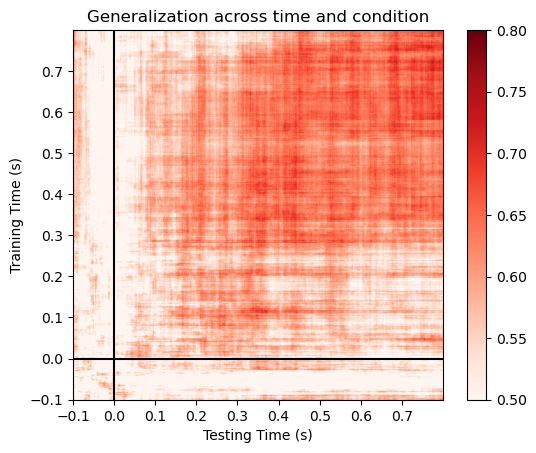

In [63]:
with open('Pronoun_decoding_genscore_ctrl_2d.npy', 'wb') as f:
    np.save(f, gen_scores_ctrl)
    
#mean_scores = gen_scores_adults.mean(0)

fig, ax = plt.subplots(1)
im = ax.matshow(gen_scores_ctrl.mean(0), vmin=0.5, vmax=0.8, cmap='Reds', origin='lower',#cmap='RdBu_r'
                extent=epo1.times[[0, -1, 0, -1]])
ax.axhline(0., color='k')
ax.axvline(0., color='k')
ax.xaxis.set_ticks_position('bottom')
ax.set_xlabel('Testing Time (s)')
ax.set_ylabel('Training Time (s)')
ax.set_title('Generalization across time and condition')
plt.colorbar(im, ax=ax)
plt.show()


-


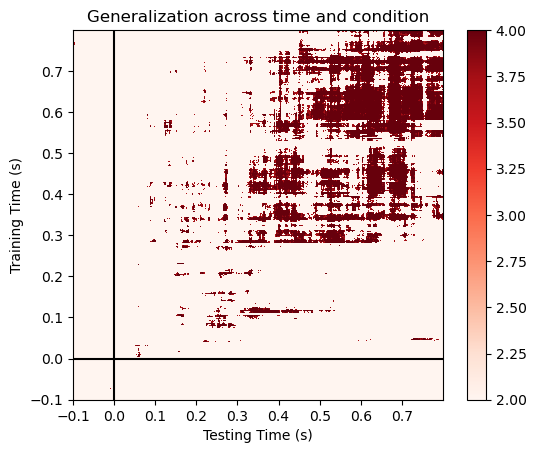

In [68]:
statistic, pvalues = stats.ttest_1samp(gen_scores_ctrl, popmean = 0.5, axis = 0)
reject_fdr, pval_fdr = mne.stats.fdr_correction(pvalues, alpha=0.01, method="indep")
tmask = np.zeros((pvalues.shape[0], pvalues.shape[1]))
tmask[reject_fdr] = statistic[reject_fdr]
#threshold_fdr = np.min(np.abs(statistic)[reject_fdr])

print('-')
fig, ax = plt.subplots(1)
im = ax.matshow(tmask, vmin=2, vmax=4, cmap='Reds', origin='lower',#cmap='RdBu_r'
                extent=epo1.times[[0, -1, 0, -1]])
ax.axhline(0., color='k')
ax.axvline(0., color='k')
ax.xaxis.set_ticks_position('bottom')
ax.set_xlabel('Testing Time (s)')
ax.set_ylabel('Training Time (s)')
ax.set_title('Generalization across time and condition')
plt.colorbar(im, ax=ax)
plt.show()